In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.anova import anova_lm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [2]:
# Problem 2

df = pd.read_csv("marketing.txt",sep=r'\s+')
df.head()

,WorkIndex,Fee,Schedule,Supervisory,Agency
0,124.3,1,1,1,1
1,120.6,1,1,1,2
2,120.7,1,1,1,3
3,122.6,1,1,1,4
4,112.7,1,1,2,1


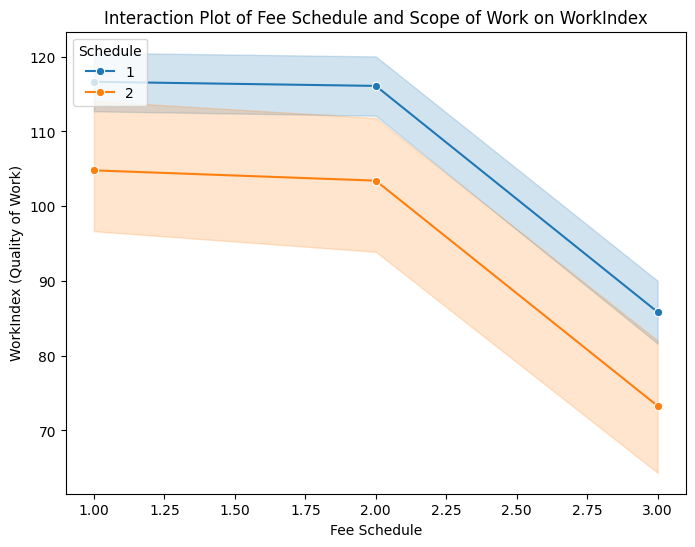

In [3]:
# Problem 2a

plt.figure(figsize=(8,6))
sns.lineplot(data=df, x='Fee', y='WorkIndex', hue='Schedule', marker='o', palette='tab10')
plt.title("Interaction Plot of Fee Schedule and Scope of Work on WorkIndex")
plt.xlabel('Fee Schedule')
plt.ylabel('WorkIndex (Quality of Work)')
plt.legend(title='Schedule', loc='upper left')
plt.show()

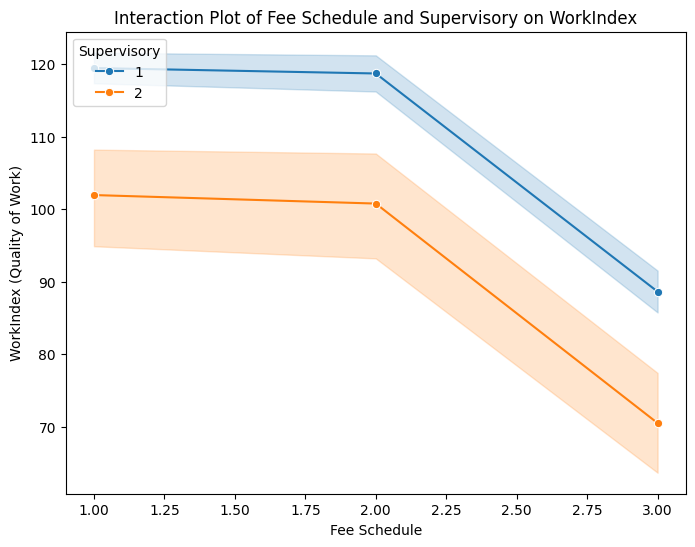

In [4]:
# Problem 2b

plt.figure(figsize=(8,6))
sns.lineplot(data=df, x='Fee', y='WorkIndex', hue='Supervisory', marker='o', palette='tab10')
plt.title("Interaction Plot of Fee Schedule and Supervisory on WorkIndex")
plt.xlabel('Fee Schedule')
plt.ylabel('WorkIndex (Quality of Work)')
plt.legend(title='Supervisory', loc='upper left')
plt.show()

In [8]:
# Fit the model with interaction term between Fee and Schedule
model = smf.ols('WorkIndex ~ C(Fee) * C(Schedule)', data=df).fit()

# Perform ANOVA
anova_results = anova_lm(model)

# Display the ANOVA table
print(anova_results)

                      df        sum_sq      mean_sq          F        PR(>F)
C(Fee)               2.0  10044.271250  5022.135625  45.089295  3.498256e-11
C(Schedule)          1.0   1833.976875  1833.976875  16.465650  2.107762e-04
C(Fee):C(Schedule)   2.0      1.601250     0.800625   0.007188  9.928389e-01
Residual            42.0   4678.043750   111.381994        NaN           NaN


In [10]:
model = smf.ols('WorkIndex ~ C(Fee) * C(Schedule) * C(Supervisory)', data=df).fit()

# Step 3: Perform the ANOVA
anova_results = anova_lm(model)

# Step 4: Display the ANOVA table
print(anova_results)

# Step 5: Extract p-value for the three-way interaction
three_way_interaction_p_value = anova_results.loc['C(Fee):C(Schedule):C(Supervisory)', 'PR(>F)']
print("p-value for the three-way interaction:", three_way_interaction_p_value)

                                     df        sum_sq      mean_sq  \
C(Fee)                              2.0  10044.271250  5022.135625   
C(Schedule)                         1.0   1833.976875  1833.976875   
C(Supervisory)                      1.0   3832.400208  3832.400208   
C(Fee):C(Schedule)                  2.0      1.601250     0.800625   
C(Fee):C(Supervisory)               2.0      0.787917     0.393958   
C(Schedule):C(Supervisory)          1.0    574.775208   574.775208   
C(Fee):C(Schedule):C(Supervisory)   2.0      3.942917     1.971458   
Residual                           36.0    266.137500     7.392708   

                                            F        PR(>F)  
C(Fee)                             679.336367  2.587876e-29  
C(Schedule)                        248.079160  1.000208e-17  
C(Supervisory)                     518.402734  5.743155e-23  
C(Fee):C(Schedule)                   0.108299  8.976502e-01  
C(Fee):C(Supervisory)                0.053290  9.481796e-01

In [13]:
# Step 2: Fit the model with main effects of Fee and Schedule
model = ols('WorkIndex ~ C(Fee) + C(Schedule)', data=df).fit()

# Step 3: Perform the ANOVA
anova_results = anova_lm(model)

# Step 4: Display the ANOVA table to check for p-values for Fee and Schedule
print(anova_results)

# Step 5: Calculate confidence intervals for the main effects
# Get the model coefficients (means for each level of Fee and Schedule)
model_summary = model.summary()

# Confidence intervals for the coefficients (levels of Fee and Schedule)
conf_int = model.conf_int(alpha=0.05)
print("Confidence Intervals for the factors:")
print(conf_int)

# Step 6: Test the p-values and interpret the results
p_value_fee = anova_results.loc['C(Fee)', 'PR(>F)']
p_value_schedule = anova_results.loc['C(Schedule)', 'PR(>F)']

print(f"P-value for Fee main effect: {p_value_fee}")
print(f"P-value for Schedule main effect: {p_value_schedule}")

               df        sum_sq      mean_sq          F        PR(>F)
C(Fee)        2.0  10044.271250  5022.135625  47.220242  1.117302e-11
C(Schedule)   1.0   1833.976875  1833.976875  17.243826  1.486057e-04
Residual     44.0   4679.645000   106.355568        NaN           NaN
Confidence Intervals for the factors:
                           0           1
Intercept         110.906353  122.906147
C(Fee)[T.2]        -8.310842    6.385842
C(Fee)[T.3]       -38.504592  -23.807908
C(Schedule)[T.2]  -18.362397   -6.362603
P-value for Fee main effect: 1.1173019093754258e-11
P-value for Schedule main effect: 0.00014860572653110918
